# 🎵 Análisis de Datos de Spotify
Este notebook explica **cajas y bigotes, boxplots, correlación y mapas de calor**
usando el dataset de `spotify_tracks.csv`.

Incluye ejemplos en Python con **Pandas, Matplotlib y Seaborn**.

In [14]:
# 📦 Importar librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo de gráficos
sns.set(style="whitegrid")

In [15]:
# 📂 Cargar dataset de Spotify desde la carpeta Datasources
from pathlib import Path
data_path = Path("spotify.csv")
if data_path.exists():
    df = pd.read_csv(data_path)
    display(df.head())
    print(f"Archivo cargado desde: {data_path}")
else:
    print("⚠️ No se encontró el archivo en:")
    print(data_path)
    print("Verifica la ruta o el nombre del archivo.")

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


Archivo cargado desde: spotify.csv


In [16]:
# Listar columnas del DataFrame para validar nombres
print(df.columns.tolist())

['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']


In [17]:
# 🔧 Preprocesamiento: limpiar y crear nuevas columnas
import numpy as np
df_clean = df.copy()
if 'Unnamed: 0' in df_clean.columns:
    df_clean = df_clean.drop(columns=['Unnamed: 0'])
df_clean['duration_min'] = df_clean['duration_ms'] / 60000.0
# Orden de géneros por mediana de duración y popularidad
order_by_duration = df_clean.groupby('track_genre')['duration_min'].median().sort_values(ascending=False).index
order_by_popularity = df_clean.groupby('track_genre')['popularity'].median().sort_values(ascending=False).index
print('Columnas finales:', df_clean.columns.tolist())
print('Géneros (top 5 por duración):', list(order_by_duration)[:5])

Columnas finales: ['track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre', 'duration_min']
Géneros (top 5 por duración): ['minimal-techno', 'detroit-techno', 'chicago-house', 'iranian', 'techno']


## 1️⃣ Cajas y Bigotes
Las cajas y bigotes permiten **detectar la dispersión y los valores atípicos**.
- Caja = rango intercuartílico (Q1–Q3)
- Línea = mediana (Q2)
- Bigotes = datos dentro de 1.5 × IQR
- Puntos = valores atípicos (outliers)

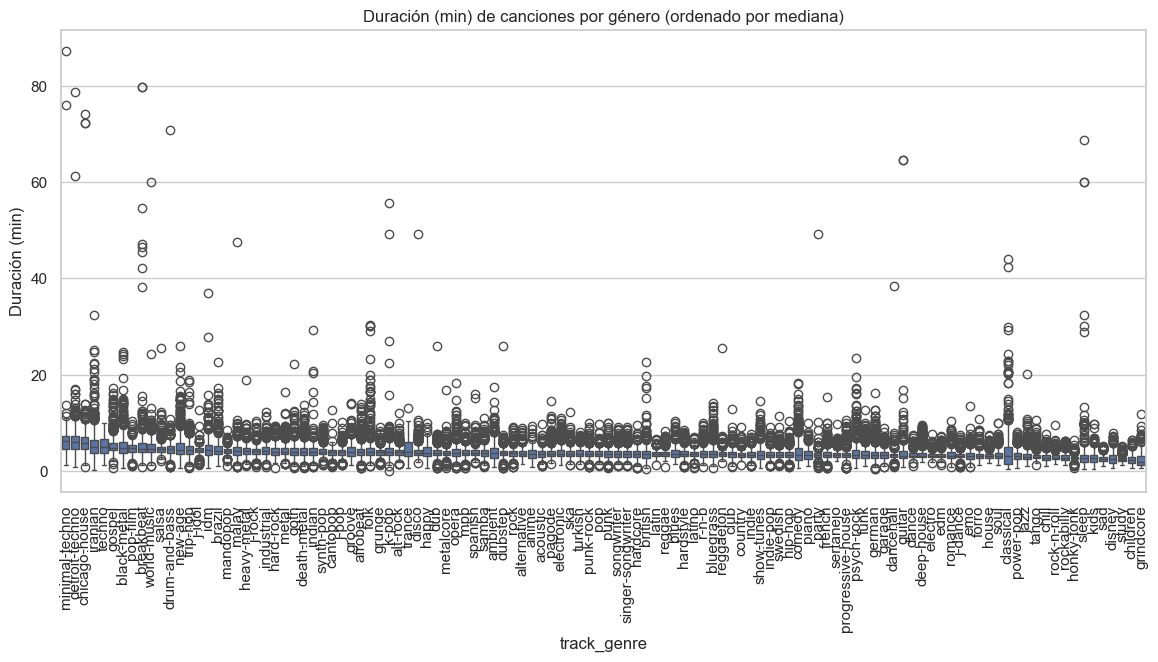

In [18]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df_clean, x="track_genre", y="duration_min", order=order_by_duration)
plt.title("Duración (min) de canciones por género (ordenado por mediana)")
plt.xticks(rotation=90)
plt.ylabel("Duración (min)")
plt.show()

## 2️⃣ Boxplots
Un boxplot se utiliza para **comparar distribuciones entre categorías**.
En este ejemplo, analizamos la **popularidad por género**.

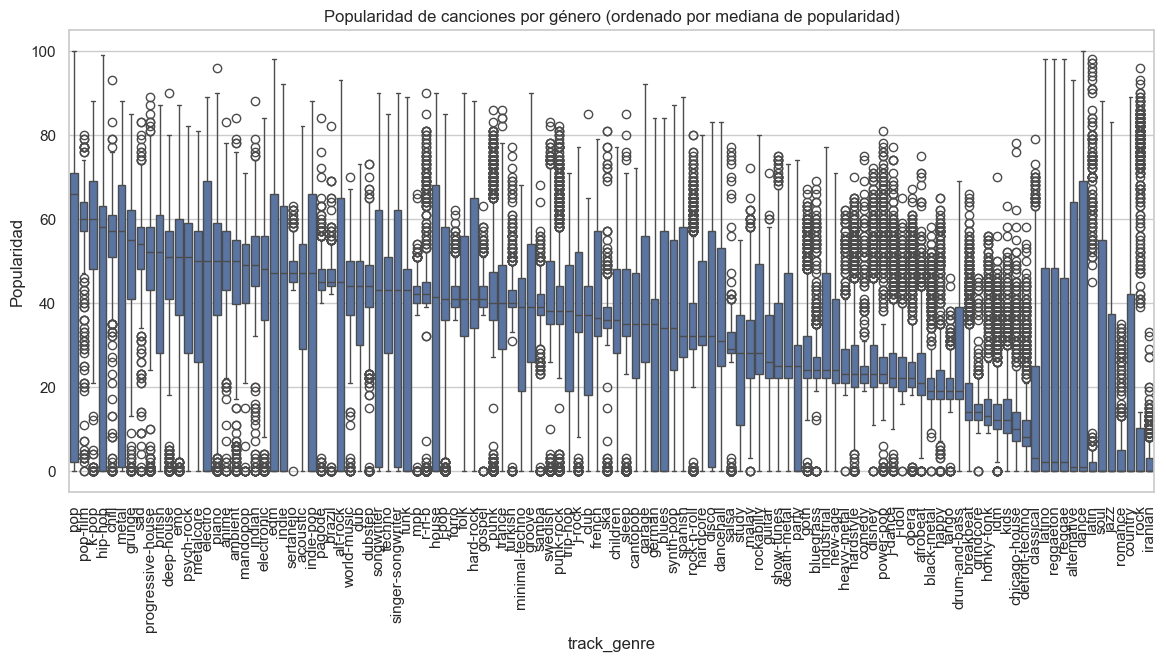

In [19]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df_clean, x="track_genre", y="popularity", order=order_by_popularity)
plt.title("Popularidad de canciones por género (ordenado por mediana de popularidad)")
plt.xticks(rotation=90)
plt.ylabel("Popularidad")
plt.show()

## 3️⃣ Correlación
La correlación mide la **relación lineal entre variables**.
- +1 = relación positiva perfecta
- -1 = relación negativa perfecta
- 0 = no hay relación

Ejemplo: ¿las canciones con mayor *energy* también son más *populares*?

In [20]:
corr = df_clean[["danceability", "energy", "valence", "popularity", "duration_min"]].corr()
corr

,danceability,energy,valence,popularity,duration_min
danceability,1.000000,0.134325,0.477341,0.035448,-0.073426
energy,0.134325,1.000000,0.258934,0.001056,0.058523
valence,0.477341,0.258934,1.000000,-0.040534,-0.154479
popularity,0.035448,0.001056,-0.040534,1.000000,-0.007101
duration_min,-0.073426,0.058523,-0.154479,-0.007101,1.000000


## 3️⃣➕ Scatter plots con línea de tendencia
A continuación se muestran diagramas de dispersión para pares de variables clave junto con la línea de regresión.
Se indica el coeficiente de correlación de Pearson (r) y su interpretación rápida:
- r > 0 → relación positiva
- r < 0 → relación negativa
- r ≈ 0 → sin relación lineal clara

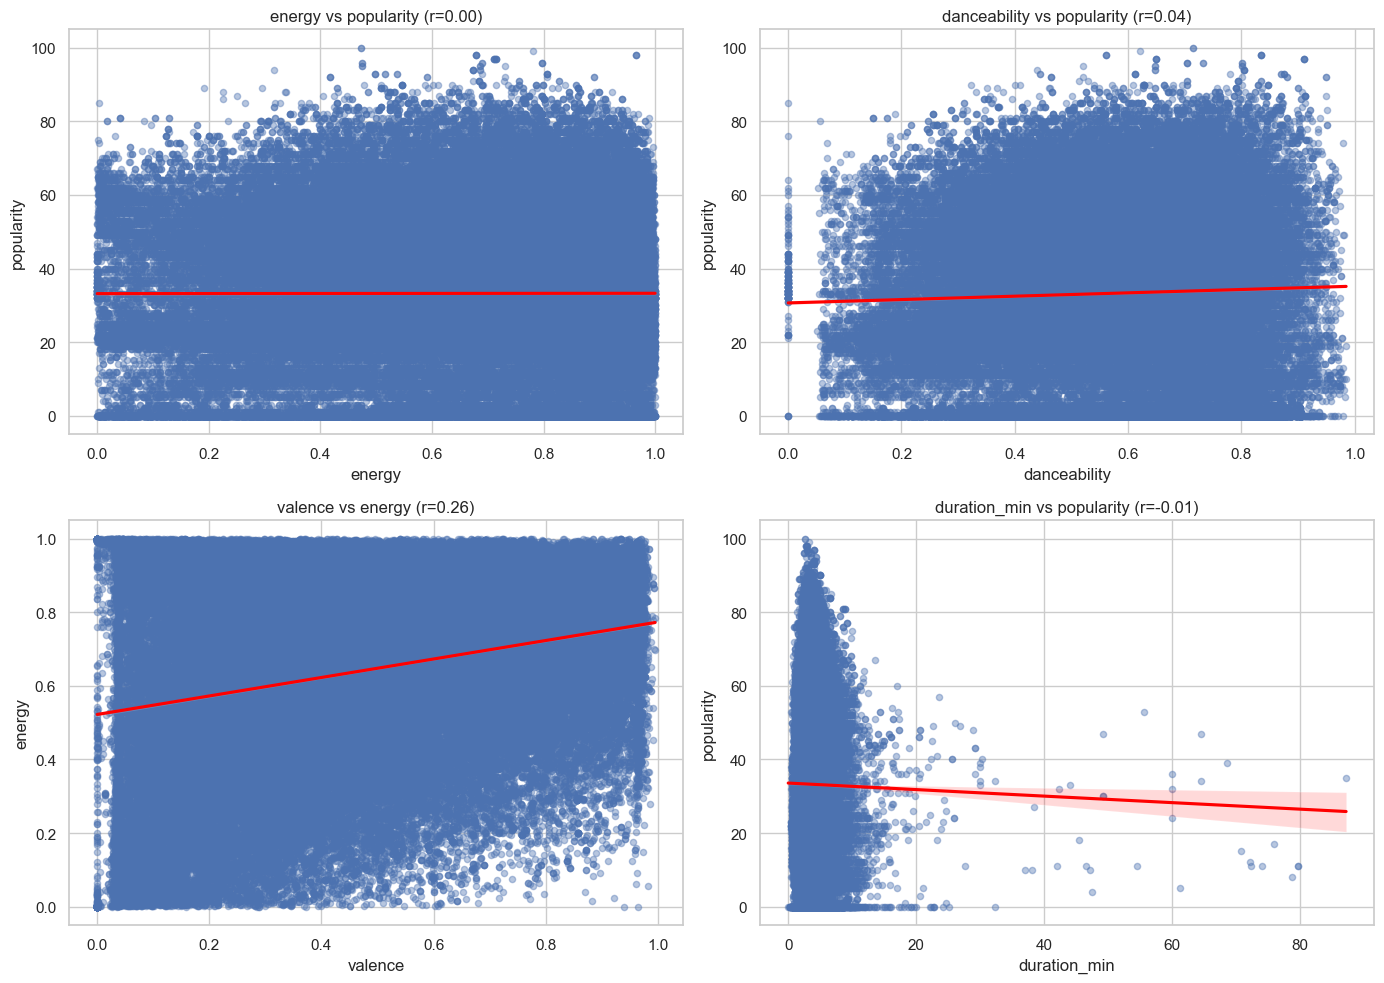


Interpretación rápida de correlaciones (scatter plots):
 - energy vs popularity: r=0.00 relación casi nula (p=0.721)
 - danceability vs popularity: r=0.04 relación casi nula (p=4.96e-33)
 - valence vs energy: r=0.26 relación positiva (p=0)
 - duration_min vs popularity: r=-0.01 relación casi nula (p=0.0165)


In [21]:
# Scatter plots con líneas de tendencia y r (sin dependencia obligatoria de SciPy)
import seaborn as sns
import matplotlib.pyplot as plt

# Intentar importar pearsonr; si no existe SciPy, se calcula r sin p-value
try:
    from scipy.stats import pearsonr  # type: ignore
    _has_scipy = True
except ImportError:  # SciPy no instalado
    _has_scipy = False

pairs = [
    ("energy", "popularity"),
    ("danceability", "popularity"),
    ("valence", "energy"),
    ("duration_min", "popularity")
]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()
interpretaciones_scatter = []

for ax, (x, y) in zip(axes, pairs):
    sub = df_clean[[x, y]].dropna()
    if len(sub) < 2:
        ax.text(0.5, 0.5, 'Datos insuficientes', ha='center', va='center')
        ax.set_axis_off()
        continue
    # Calcular correlación
    if _has_scipy:
        r, p = pearsonr(sub[x], sub[y])  # precisa p-value
    else:
        r = sub[x].corr(sub[y])  # Pearson por defecto
        p = float('nan')
    sns.regplot(data=sub, x=x, y=y, ax=ax,
                scatter_kws={'alpha': 0.4, 's': 20},
                line_kws={'color': 'red'})
    ax.set_title(f"{x} vs {y} (r={r:.2f})")
    # Interpretación básica
    if r > 0.1:
        sentido = 'positiva'
    elif r < -0.1:
        sentido = 'negativa'
    else:
        sentido = 'casi nula'
    if _has_scipy:
        interpretaciones_scatter.append(f"{x} vs {y}: r={r:.2f} relación {sentido} (p={p:.3g})")
    else:
        interpretaciones_scatter.append(f"{x} vs {y}: r={r:.2f} relación {sentido} (p=N/A, SciPy no instalado)")

plt.tight_layout()
plt.show()

print("\nInterpretación rápida de correlaciones (scatter plots):")
for linea in interpretaciones_scatter:
    print(" - " + linea)

if not _has_scipy:
    print("\nNota: Instala SciPy (pip install scipy) para obtener p-values.")

## 4️⃣ Mapas de Calor
Un **heatmap** nos permite visualizar la matriz de correlaciones.
Los colores indican si la relación es **positiva o negativa**.

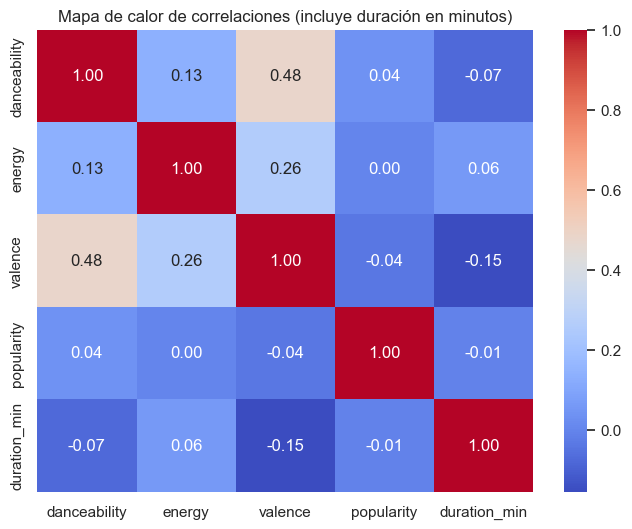

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor de correlaciones (incluye duración en minutos)")
plt.show()

### 🧐 Interpretación del mapa de calor
El mapa de calor muestra la fuerza y dirección de la relación lineal entre las variables numéricas:
- danceability: Qué tan bailable es una pista (0–1).
- energy: Intensidad y actividad (0–1).
- valence: Positividad emocional (0–1).
- popularity: Popularidad (escala Spotify, típicamente 0–100).
- duration_min: Duración en minutos.

Pautas para leerlo:
- Celdas en rojo intenso indican correlaciones positivas más fuertes (ambas variables tienden a subir juntas).
- Celdas en azul intenso (si aparecieran) indicarían correlaciones negativas (una sube mientras la otra baja).
- Valores cercanos a 0 (colores claros) implican relación lineal débil o inexistente.

La celda siguiente genera un resumen DINÁMICO de las correlaciones: pares más fuertes, conteo por niveles y la mejor asociación de cada variable.

In [23]:
# 🔄 Resumen dinámico de la matriz de correlación
import pandas as pd
import numpy as np

if 'corr' not in globals():
    corr = df_clean[["danceability", "energy", "valence", "popularity", "duration_min"]].corr()

# Obtener pares únicos (triángulo superior sin diagonal)
pares = []
cols = corr.columns
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        a, b = cols[i], cols[j]
        pares.append((a, b, corr.iloc[i, j]))

# Ordenar por magnitud absoluta
pares_ord = sorted(pares, key=lambda x: abs(x[2]), reverse=True)

# Clasificar niveles
niveles = {
    'muy fuerte (|r| >= 0.7)': [],
    'fuerte (0.5 <= |r| < 0.7)': [],
    'moderada (0.3 <= |r| < 0.5)': [],
    'débil (0.1 <= |r| < 0.3)': [],
    'casi nula (|r| < 0.1)': []
}
for a,b,r in pares:
    ar = abs(r)
    if ar >= 0.7: niveles['muy fuerte (|r| >= 0.7)'].append((a,b,r))
    elif ar >= 0.5: niveles['fuerte (0.5 <= |r| < 0.7)'].append((a,b,r))
    elif ar >= 0.3: niveles['moderada (0.3 <= |r| < 0.5)'].append((a,b,r))
    elif ar >= 0.1: niveles['débil (0.1 <= |r| < 0.3)'].append((a,b,r))
    else: niveles['casi nula (|r| < 0.1)'].append((a,b,r))

# Mejor asociación para cada variable
mejor_por_var = {}
for v in cols:
    mejores = []
    for a,b,r in pares:
        if a == v or b == v:
            mejores.append((a if b == v else b, r))
    if mejores:
        mejor_por_var[v] = sorted(mejores, key=lambda x: abs(x[1]), reverse=True)[0]

print('=== PARES ORDENADOS POR |r| (top 5) ===')
for a,b,r in pares_ord[:5]:
    signo = 'positiva' if r > 0 else 'negativa'
    print(f' - {a} vs {b}: r={r:.2f} ({signo})')

print('\n=== DISTRIBUCIÓN POR NIVELES ===')
for nivel, lista in niveles.items():
    print(f' {nivel}: {len(lista)} pares')

print('\n=== MEJOR ASOCIACIÓN POR VARIABLE ===')
for var,(otro,r) in mejor_por_var.items():
    signo = 'positiva' if r > 0 else 'negativa'
    print(f' - {var} con {otro}: r={r:.2f} ({signo})')

# Tabla resumen opcional
res_df = pd.DataFrame(pares_ord, columns=['var_a','var_b','r'])
res_df.head()

=== PARES ORDENADOS POR |r| (top 5) ===
 - danceability vs valence: r=0.48 (positiva)
 - energy vs valence: r=0.26 (positiva)
 - valence vs duration_min: r=-0.15 (negativa)
 - danceability vs energy: r=0.13 (positiva)
 - danceability vs duration_min: r=-0.07 (negativa)

=== DISTRIBUCIÓN POR NIVELES ===
 muy fuerte (|r| >= 0.7): 0 pares
 fuerte (0.5 <= |r| < 0.7): 0 pares
 moderada (0.3 <= |r| < 0.5): 1 pares
 débil (0.1 <= |r| < 0.3): 3 pares
 casi nula (|r| < 0.1): 6 pares

=== MEJOR ASOCIACIÓN POR VARIABLE ===
 - danceability con valence: r=0.48 (positiva)
 - energy con valence: r=0.26 (positiva)
 - valence con danceability: r=0.48 (positiva)
 - popularity con valence: r=-0.04 (negativa)
 - duration_min con valence: r=-0.15 (negativa)


,var_a,var_b,r
0,danceability,valence,0.477341
1,energy,valence,0.258934
2,valence,duration_min,-0.154479
3,danceability,energy,0.134325
4,danceability,duration_min,-0.073426


In [24]:
# 🗣️ Cinco oraciones de interpretación de la correlación
import numpy as np

if 'corr' not in globals():
    corr = df_clean[["danceability", "energy", "valence", "popularity", "duration_min"]].corr()

# Obtener pares únicos
pares = []
cols = corr.columns
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        pares.append((cols[i], cols[j], corr.iloc[i, j]))

# 1. Mayor correlación absoluta
pareja_top = max(pares, key=lambda x: abs(x[2]))
# 2. Menor correlación absoluta
pareja_min = min(pares, key=lambda x: abs(x[2]))
# 3. Variable con mayor suma de |r| (influencia global)
influencia = {}
for v in cols:
    influencia[v] = sum(abs(corr[v].drop(v)))
var_mas_rel = max(influencia.items(), key=lambda x: x[1])
var_menos_rel = min(influencia.items(), key=lambda x: x[1])
# 4. Media de correlaciones con popularity
if 'popularity' in cols:
    media_pop = corr['popularity'].drop('popularity').mean()
else:
    media_pop = float('nan')

sentencias = []
# Oración 1
sentencias.append(f"La relación más fuerte es entre {pareja_top[0]} y {pareja_top[1]} (r={pareja_top[2]:.2f}), indicando asociación {'positiva' if pareja_top[2]>0 else 'negativa'} clara.")
# Oración 2
sentencias.append(f"La relación más débil aparece entre {pareja_min[0]} y {pareja_min[1]} (r={pareja_min[2]:.2f}), prácticamente sin dependencia lineal.")
# Oración 3
sentencias.append(f"La variable con mayor conectividad global es {var_mas_rel[0]} (suma de |r|={var_mas_rel[1]:.2f}), actuando como eje en el conjunto.")
# Oración 4
sentencias.append(f"La variable más independiente relativa es {var_menos_rel[0]}, con menor suma de correlaciones absolutas ({var_menos_rel[1]:.2f}).")
# Oración 5
sentencias.append(f"En promedio, las características asociadas a popularidad muestran un nivel medio de correlación (media r={media_pop:.2f}), sugiriendo que ningún rasgo único domina totalmente la popularidad.")

for s in sentencias:
    print("- " + s)

- La relación más fuerte es entre danceability y valence (r=0.48), indicando asociación positiva clara.
- La relación más débil aparece entre energy y popularity (r=0.00), prácticamente sin dependencia lineal.
- La variable con mayor conectividad global es valence (suma de |r|=0.93), actuando como eje en el conjunto.
- La variable más independiente relativa es popularity, con menor suma de correlaciones absolutas (0.08).
- En promedio, las características asociadas a popularidad muestran un nivel medio de correlación (media r=-0.00), sugiriendo que ningún rasgo único domina totalmente la popularidad.


## ✅ Conclusiones
- Los boxplots ayudan a detectar géneros con mayor dispersión de duración o popularidad.
- La correlación muestra qué características musicales están más relacionadas entre sí.
- El heatmap facilita la interpretación visual de estas relaciones.

👉 Este tipo de análisis es esencial para entender tendencias en plataformas como **Spotify**.

In [25]:
# 🤖 Resumen automático de insights
import numpy as np
summary = []
if 'df_clean' in globals():
    # Top géneros por mediana de popularidad y duración
    top_pop = df_clean.groupby('track_genre')['popularity'].median().sort_values(ascending=False).head(5)
    top_dur = df_clean.groupby('track_genre')['duration_min'].median().sort_values(ascending=False).head(5)
    # Correlaciones fuertes (absolutas > 0.5)
    strong_corr = corr.copy()
    strong_pairs = []
    for i,col in enumerate(strong_corr.columns):
        for j,row in enumerate(strong_corr.index):
            if j <= i:
                continue
            val = strong_corr.loc[row,col]
            if abs(val) >= 0.5:
                strong_pairs.append((row,col,round(val,2)))
    # Outliers aproximados por género en duración (IQR)
    outlier_counts = {}
    for g, sub in df_clean.groupby('track_genre'):
        q1 = sub['duration_min'].quantile(0.25)
        q3 = sub['duration_min'].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5*iqr
        upper = q3 + 1.5*iqr
        outliers = sub[(sub['duration_min'] < lower) | (sub['duration_min'] > upper)]
        outlier_counts[g] = len(outliers)
    top_outliers = sorted(outlier_counts.items(), key=lambda x: x[1], reverse=True)[:5]
    summary.append('=== INSIGHTS AUTOMÁTICOS ===')
    summary.append('\nTop 5 géneros por mediana de popularidad:')
    summary.extend([f'  - {g}: {v}' for g,v in top_pop.items()])
    summary.append('\nTop 5 géneros por mediana de duración (min):')
    summary.extend([f'  - {g}: {round(v,2)} min' for g,v in top_dur.items()])
    if strong_pairs:
        summary.append('\nParejas con correlación fuerte (|r| >= 0.5):')
        for a,b,v in strong_pairs:
            summary.append(f'  - {a} vs {b}: r={v}')
    else:
        summary.append('\nNo se detectaron correlaciones con |r| >= 0.5.')
    summary.append('\nGéneros con mayor número de outliers (duración):')
    for g,cnt in top_outliers:
        summary.append(f'  - {g}: {cnt} outliers')
else:
    summary.append('df_clean no está disponible. Ejecuta las celdas de preprocesamiento.')
print('\n'.join(summary))

=== INSIGHTS AUTOMÁTICOS ===

Top 5 géneros por mediana de popularidad:
  - pop: 66.0
  - pop-film: 60.0
  - k-pop: 60.0
  - hip-hop: 58.0
  - chill: 57.0

Top 5 géneros por mediana de duración (min):
  - minimal-techno: 6.17 min
  - detroit-techno: 6.02 min
  - chicago-house: 5.78 min
  - iranian: 4.98 min
  - techno: 4.94 min

No se detectaron correlaciones con |r| >= 0.5.

Géneros con mayor número de outliers (duración):
  - deep-house: 137 outliers
  - progressive-house: 87 outliers
  - afrobeat: 83 outliers
  - german: 81 outliers
  - disco: 71 outliers


In [26]:
# 📝 Interpretación detallada de los gráficos
interpretaciones = []

if 'df_clean' in globals():
    # Recalcular elementos clave para asegurar reproducibilidad
    import numpy as np
    # 1. Boxplot duración
    dur_median = df_clean.groupby('track_genre')['duration_min'].median().sort_values(ascending=False)
    top_dur_genres = dur_median.head(3)
    bottom_dur_genres = dur_median.tail(3)
    rango_dur = round(dur_median.max() - dur_median.min(), 2)
    interpretaciones.append('1) Boxplot de duración por género:')
    interpretaciones.append(f'   • Los géneros con mayor mediana de duración (top 3) son: {", ".join([f"{g} ({round(v,2)} min)" for g,v in top_dur_genres.items()])}.')
    interpretaciones.append(f'   • Los géneros con menor mediana de duración (últimos 3) son: {", ".join([f"{g} ({round(v,2)} min)" for g,v in bottom_dur_genres.items()])}.')
    interpretaciones.append(f'   • Diferencia aproximada entre la mediana más alta y la más baja: {rango_dur} minutos.')
    interpretaciones.append('   • La presencia de puntos fuera de los “bigotes” indica outliers: canciones inusualmente largas o cortas.')

    # 2. Boxplot popularidad
    pop_median = df_clean.groupby('track_genre')['popularity'].median().sort_values(ascending=False)
    top_pop_genres = pop_median.head(3)
    bottom_pop_genres = pop_median.tail(3)
    rango_pop = int(pop_median.max() - pop_median.min())
    interpretaciones.append('\n2) Boxplot de popularidad por género:')
    interpretaciones.append(f'   • Géneros con mayor mediana de popularidad (top 3): {", ".join([f"{g} ({int(v)})" for g,v in top_pop_genres.items()])}.')
    interpretaciones.append(f'   • Géneros con menor mediana de popularidad (últimos 3): {", ".join([f"{g} ({int(v)})" for g,v in bottom_pop_genres.items()])}.')
    interpretaciones.append(f'   • Amplitud aproximada de medianas entre el más y menos popular: {rango_pop} puntos.')
    interpretaciones.append('   • Una caja más alta y compacta sugiere consistencia en popularidad dentro del género.')

    # 3. Matriz de correlación / Heatmap
    vars_corr = ["danceability", "energy", "valence", "popularity", "duration_min"]
    corr_local = df_clean[vars_corr].corr()
    pares = []
    for i, a in enumerate(vars_corr):
        for j, b in enumerate(vars_corr):
            if j <= i:  # evitar duplicados y diagonales
                continue
            pares.append((a, b, corr_local.loc[a, b]))
    pares_orden = sorted(pares, key=lambda x: abs(x[2]), reverse=True)
    top_corr = [(a, b, round(v, 2)) for a, b, v in pares_orden[:3]]
    interpretaciones.append('\n3) Correlaciones (tabla y heatmap):')
    for a, b, v in top_corr:
        sentido = 'positiva' if v > 0 else 'negativa'
        interpretaciones.append(f'   • {a} vs {b}: r={v} ({sentido}).')
    interpretaciones.append('   • Valores cercanos a 0 indican relación débil; colores más intensos en el heatmap resaltan asociaciones fuertes.')

    # 4. Outliers (duración) – reutilizamos lógica IQR
    outlier_info = []
    for g, sub in df_clean.groupby('track_genre'):
        q1 = sub['duration_min'].quantile(0.25)
        q3 = sub['duration_min'].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        outliers = sub[(sub['duration_min'] < lower) | (sub['duration_min'] > upper)]
        if len(sub) > 0:
            outlier_info.append((g, len(outliers), round(100 * len(outliers) / len(sub), 1)))
    outlier_info_sorted = sorted(outlier_info, key=lambda x: x[1], reverse=True)[:3]
    interpretaciones.append('\n4) Outliers de duración:')
    for g, c, pct in outlier_info_sorted:
        interpretaciones.append(f'   • {g}: {c} outliers (~{pct}% del género).')
    interpretaciones.append('   • Un porcentaje alto puede indicar subgéneros mixtos o variabilidad estilística.')

    # 5. Síntesis global
    interpretaciones.append('\n5) Síntesis:')
    interpretaciones.append('   • Los boxplots permiten detectar géneros extremos en duración y popularidad rápidamente.')
    interpretaciones.append('   • Las correlaciones identifican combinaciones de características que podrían influir juntas (e.g., energía y valence).')
    interpretaciones.append('   • Los outliers ayudan a focalizar posibles casos especiales para análisis cualitativo.')
else:
    interpretaciones.append('df_clean no está definido. Ejecuta las celdas anteriores antes de interpretar.')

print('\n'.join(interpretaciones))

1) Boxplot de duración por género:
   • Los géneros con mayor mediana de duración (top 3) son: minimal-techno (6.17 min), detroit-techno (6.02 min), chicago-house (5.78 min).
   • Los géneros con menor mediana de duración (últimos 3) son: study (2.31 min), children (2.27 min), grindcore (1.84 min).
   • Diferencia aproximada entre la mediana más alta y la más baja: 4.33 minutos.
   • La presencia de puntos fuera de los “bigotes” indica outliers: canciones inusualmente largas o cortas.

2) Boxplot de popularidad por género:
   • Géneros con mayor mediana de popularidad (top 3): pop (66), pop-film (60), k-pop (60).
   • Géneros con menor mediana de popularidad (últimos 3): country (0), rock (0), iranian (0).
   • Amplitud aproximada de medianas entre el más y menos popular: 66 puntos.
   • Una caja más alta y compacta sugiere consistencia en popularidad dentro del género.

3) Correlaciones (tabla y heatmap):
   • danceability vs valence: r=0.48 (positiva).
   • energy vs valence: r=0.26 